# CRISP Metrics DATA SCIENCE INTERNSHIP:

# Task 1 : Prediction and comparing accuracies of different models using Supervised ML

Using the 'diseases' dataset to perform visualization task and make use different algorithm to predict label.

# NAME:Parul Singh R

# Importing Modules used in this notebook:

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

# Reading Dataset:

In [2]:
# Reading the dataset
df = pd.read_csv('Training.csv')
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [3]:
df.shape

(4920, 134)

In [4]:
# Getting a basic statistics of the dataset
df.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Unnamed: 133
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,0.0
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,NaN
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN


# Preprocessing of dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


In [6]:
# Checking for null values
df.isnull().values.any()

True

In [7]:
unwanted_val = df.drop('Unnamed: 133', axis = 1, inplace = True)

In [8]:
uwt = df.drop('prognosis', axis=1,inplace = True)

In [10]:
# Checking again for null values
df.isnull().values.any()

False

In [11]:
df.shape

(4920, 132)

In [12]:
# Finding the correlations
df.corr()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
itching,1.000000,0.318158,0.326439,-0.086906,-0.059893,-0.175905,-0.160650,0.202850,-0.086906,-0.059893,...,-0.059893,-0.059893,-0.059893,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573
skin_rash,0.318158,1.000000,0.298143,-0.094786,-0.065324,-0.029324,0.171134,0.161784,-0.094786,-0.065324,...,0.320859,0.320859,0.320859,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087
nodal_skin_eruptions,0.326439,0.298143,1.000000,-0.032566,-0.022444,-0.065917,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073
continuous_sneezing,-0.086906,-0.094786,-0.032566,1.000000,0.608981,0.446238,-0.087351,-0.047254,-0.047254,-0.032566,...,-0.032566,-0.032566,-0.032566,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480
shivering,-0.059893,-0.065324,-0.022444,0.608981,1.000000,0.295332,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
small_dents_in_nails,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,0.359845,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,0.946120,0.946120,1.000000,0.946120,-0.023720,-0.023720,-0.023720
inflammatory_nails,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,0.359845,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,0.946120,0.946120,0.946120,1.000000,-0.023720,-0.023720,-0.023720
blister,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,-0.061889,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,-0.023720,-0.023720,-0.023720,-0.023720,1.000000,0.946120,0.946120
red_sore_around_nose,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,-0.061889,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,-0.023720,-0.023720,-0.023720,-0.023720,0.946120,1.000000,0.946120


In [13]:
# Split the data to feature and target values
X = df.iloc[:, 1:].values
Y = df.iloc[:, 0].values

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25, random_state = 0)

In [17]:
len(X_test)

1230

In [18]:
len(Y_test)

1230

In [19]:
len(X_train)

3690

In [20]:
len(Y_train)

3690

In [21]:
#creating list for acuracy values and model names:
acc = []
model = []

# Linear Regression Model:

In [22]:
from sklearn.linear_model import LinearRegression
LIR = LinearRegression()
LIR.fit(X_train, Y_train)
wild = LIR.predict(X_test)
a = LIR.score(X_test,Y_test)
acc.append(a)
model.append('LIR')
print("Test accuracy : {:2f}%".format(LIR.score(X_test, Y_test) * 100 ))

Test accuracy : 83.601453%


# Logistic Regression Model:

In [29]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, Y_train)
predictions = LR.predict(X_test)
l = LR.score(X_test,Y_test)
acc.append(l)
model.append('LR')
print("Test accuracy : {:2f}%".format(LR.score(X_test, Y_test) * 100 ))

Test accuracy : 98.861789%


# Support Vector Machine:

In [30]:
from sklearn.svm import SVC
import sklearn.metrics as metrics
SVM = SVC(gamma='auto')
SVM.fit(X_train,Y_train)
predicted_values = SVM.predict(X_test)
s = metrics.accuracy_score(Y_test,predicted_values)
acc.append(s)
model.append('SVM')
print("Test accuracy : {:2f}%".format(SVM.score(X_test, Y_test) * 100 ))

Test accuracy : 97.235772%


# Decision Tree Model:

In [31]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
DC = DecisionTreeClassifier()
DC.fit(X_train,Y_train)
tree = DC.predict(X_test)
z = DC.score(X_test,Y_test)
acc.append(z)
model.append('DC')
print("Test accuracy : {:2f}%".format(DC.score(X_test, Y_test) * 100 ))

Test accuracy : 98.861789%


# K Neighbors Classifier:

In [32]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)

KNN.fit(X_train,Y_train)

#Predict Output
predicted= KNN.predict(X_test) 
k = KNN.score(X_test,Y_test)
acc.append(k)
model.append('KNN')
print("Test accuracy : {:2f}%".format(KNN.score(X_test, Y_test) * 100 ))

Test accuracy : 98.861789%


# Ploting acuracy of all models:

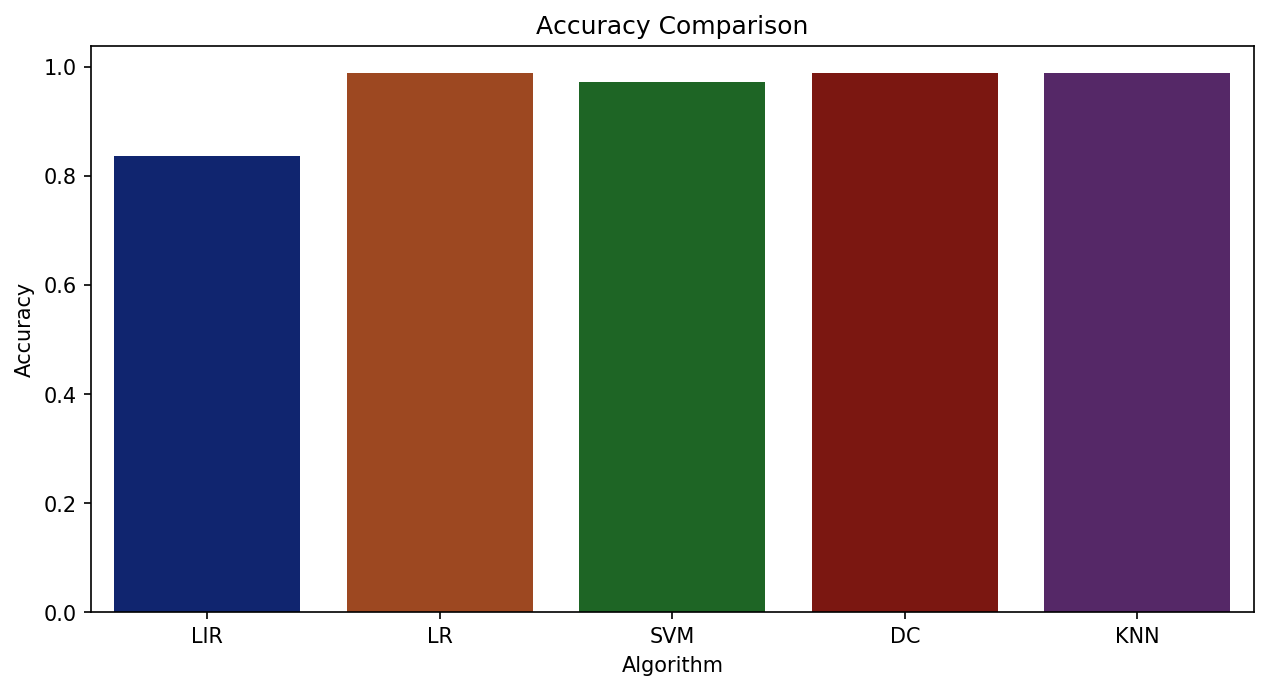

In [35]:
plt.figure(figsize = [10,5], dpi = 150)
plt.title('Accuracy Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
sns.barplot(x = model,y = acc, palette='dark')

# Conclusion:

From the above Barplot it is clear that KNN and decision tree and Logistic regression gives good prediction values 
and linear regression model cannot been used for this kind of dataset problems.

# Thank you....